# IRIS Dataset

## Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## Analysis

In [3]:
print("Keys of iris: \n{}".format(iris.keys()))

Keys of iris: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print("Target names: {}\nFeature names: {}".format(iris.target_names, iris.feature_names))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
#iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


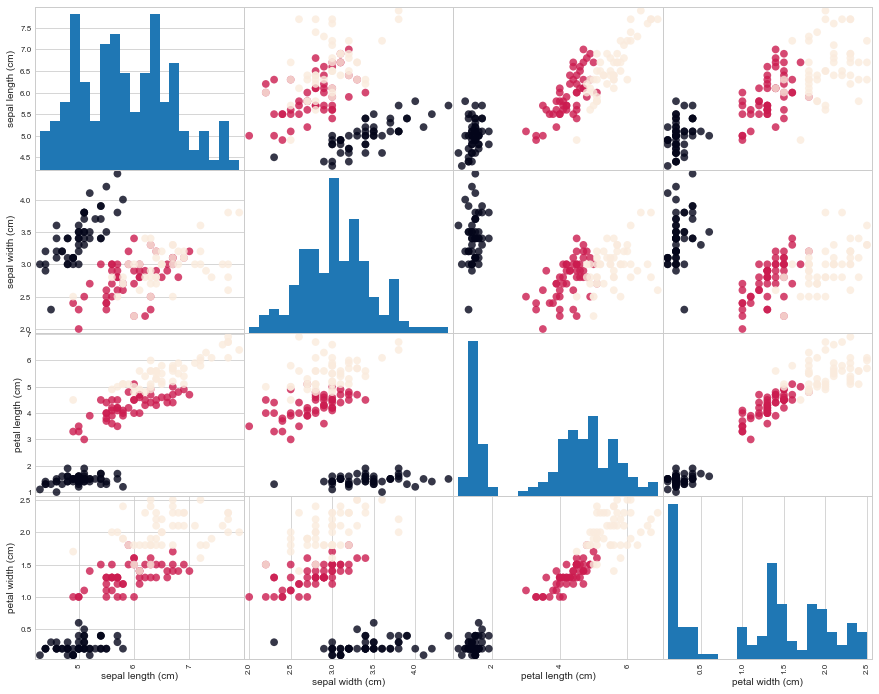

In [10]:
grr = pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(15,12), marker='o',
                       hist_kwds={'bins':20}, s=60, alpha=0.8)

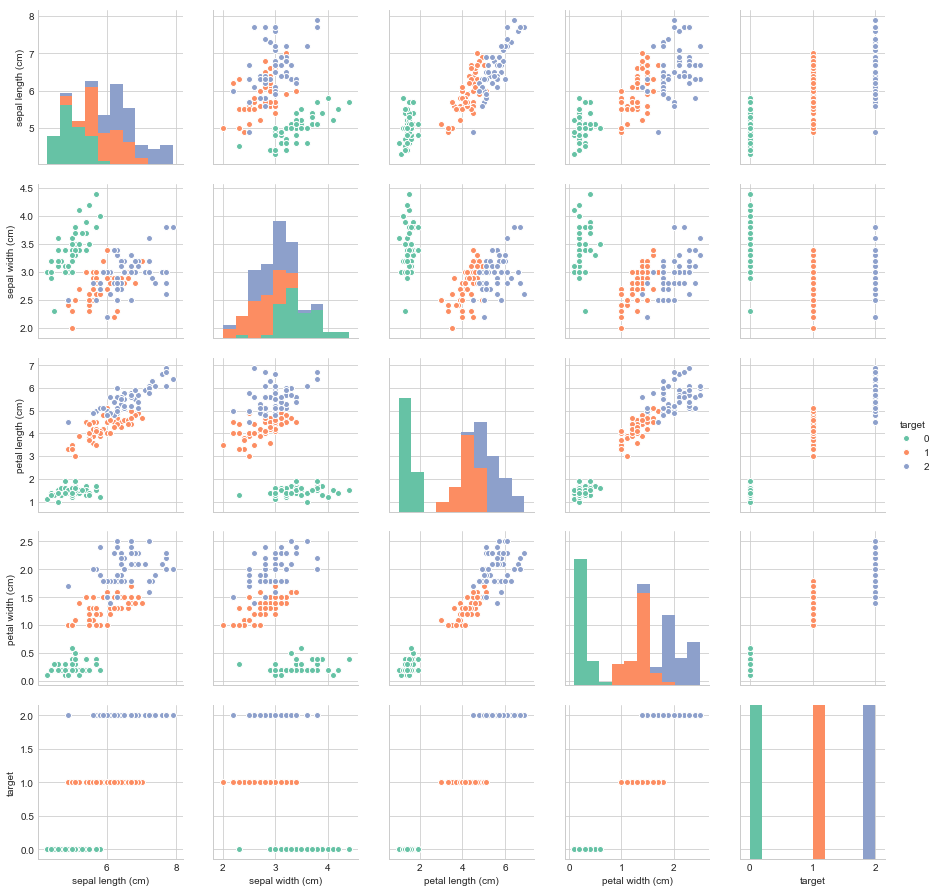

In [13]:
data = iris_df.copy()
data["target"] = iris.target

#data.head()
sns.pairplot(data=data,hue="target", palette="Set2")

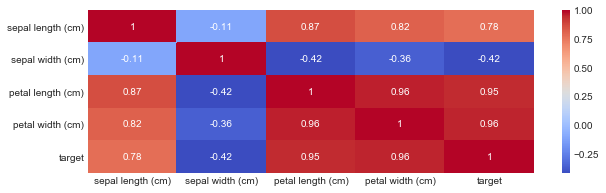

In [18]:
plt.figure(figsize=(10,3))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

## scikit-learn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

pd.Series(y_test).value_counts()

1    18
0    16
2    11
dtype: int64

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.98


## Testing n_neighbors

### Measuring error:

In [16]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

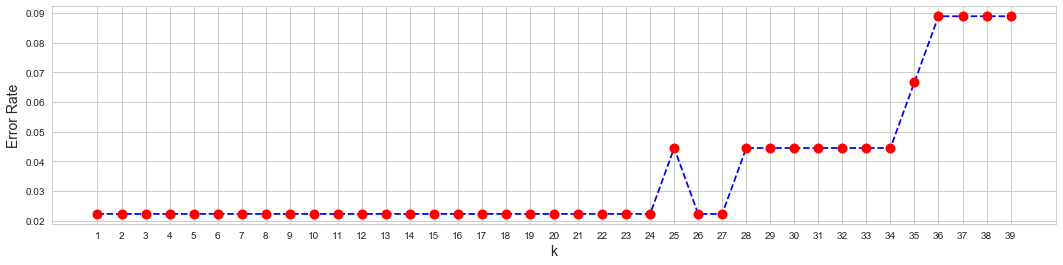

In [40]:
plt.figure(figsize=(18,4))

plt.plot(range(1,40), error_rate, 'b--', marker='o', markerfacecolor="red", markersize=10)

plt.xlabel("k", fontsize=14)
plt.ylabel("Error Rate", fontsize=14)
plt.xticks(range(1,40))
plt.show()

### Measuring accuracy:


In [20]:
train_accuracy = []
test_accuracy = []

for n_neighbors in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

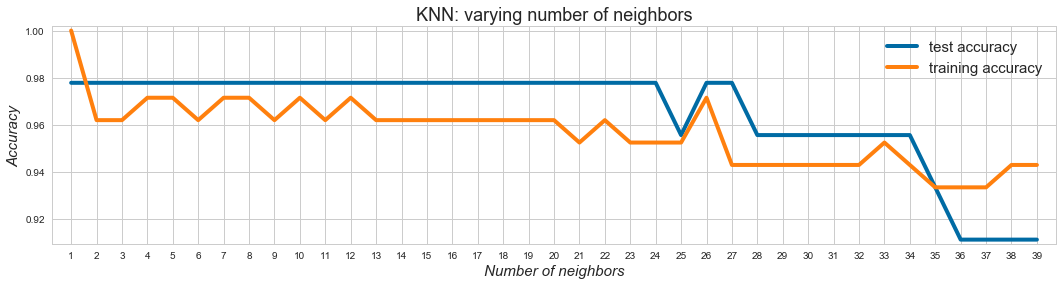

In [45]:
fig, ax = plt.subplots(figsize=(18,4))

rgb_blue = (0/255,107/255,164/255)
rgb_dark = (89/255,89/255,89/255)
rgb_orange = (255/255,128/255,14/255)

ax.plot(range(1,40), test_accuracy, label='test accuracy', c=rgb_blue, linewidth=4)#, marker='o', markerfacecolor='red')
ax.plot(range(1,40), train_accuracy, label='training accuracy', c=rgb_orange, linewidth=4)
ax.set_xlabel("Number of neighbors", fontsize=15, fontstyle='italic')
ax.set_ylabel("Accuracy", fontsize=15, fontstyle='italic')
ax.set_xticks(range(1,40))

plt.title('KNN: varying number of neighbors', fontsize=18)
plt.legend(fontsize=15)
plt.margins(0.02)
plt.show()

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
print("unique classes in training data: {}".format(logreg.classes_))

unique classes in training data: [0 1 2]


In [61]:
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
print("unique classes in training data: {}".format(logreg.classes_))

unique classes in training data: ['setosa' 'versicolor' 'virginica']


In [68]:
print("predictions: {}".format(logreg.predict(X_test)[:12]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test)[:12], axis=1)
print("\nArgmax of decision function: {}".format(argmax_dec_func))
print("\nArgmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:12]))

predictions: ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor']

Argmax of decision function: [2 1 0 2 0 2 0 1 1 1 2 1]

Argmax combined with classes_: ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor']


# GradientBoosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gbc = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

### Decision Function

In [48]:
print("Decision function shape: {}".format(gbc.decision_function(X_test).shape))
print("Decision function first 4 entries:\n{}".format(np.round(gbc.decision_function(X_test)[:4,:],3)))

Decision function shape: (45, 3)
Decision function first 4 entries:
[[-0.512 -0.532  1.533]
 [-0.517  1.506 -0.478]
 [ 1.516 -0.53  -0.477]
 [-0.513 -0.532  1.533]]


In [50]:
print("Argmax of decision function:\n{}".format(np.argmax(gbc.decision_function(X_test), axis=1)))
print("\nPredictions:\n{}".format(gbc.predict(X_test)))

Argmax of decision function:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]

Predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


### Prediction Probabilities

In [56]:
print("Predicted probabilities:\n{}".format(np.round(gbc.predict_proba(X_test)[:4],3)))
print("\nRow sums:\n{}".format(gbc.predict_proba(X_test)[:4].sum(axis=1)))

Predicted probabilities:
[[ 0.103  0.101  0.796]
 [ 0.104  0.788  0.108]
 [ 0.79   0.102  0.108]
 [ 0.103  0.101  0.796]]

Row sums:
[ 1.  1.  1.  1.]


In [57]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbc.predict_proba(X_test), axis=1)))
print("\nPredictions:\n{}".format(gbc.predict(X_test)))

Argmax of predicted probabilities:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]

Predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
